### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [117]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

```
There are no nan values in the dataset
```

# Data cleaning

## Split column 'personal_status' into 'gender' and 'marital_status'

In [119]:
df['personal_status'].unique()

array(["'male single'", "'female div/dep/mar'", "'male div/sep'",
       "'male mar/wid'"], dtype=object)

In [120]:
df[['gender', 'marital_status']] = df.apply(func=lambda x: x['personal_status'][1:-1].split(), axis=1, result_type='expand')
df.drop(columns=['personal_status'],inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   other_parties           1000 non-null   object
 9   residence_since         1000 non-null   int64 
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   int64 
 12  other_payment_plans     1000 non-null   object
 13  housing                 1000 non-null   object
 14  existing_credits        1000 non-null   int64 
 15  job  

In [122]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [123]:
df['marital_status'].unique()

array(['single', 'div/dep/mar', 'div/sep', 'mar/wid'], dtype=object)

## Factorize data
There are multiple columns of dtype object but having limited number of unique values. We can convert them to numerical values so that we can find correlation between all the columns in the dataset using dataframe.corr function

In [124]:
for column in df:
    if df[column].dtype == object:
        print(column)
        print(df[column].unique())
        print(df[column].unique().size)


checking_status
["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]
4
credit_history
["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]
5
purpose
['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']
10
savings_status
["'no known savings'" "'<100'" "'500<=X<1000'" "'>=1000'" "'100<=X<500'"]
5
employment
["'>=7'" "'1<=X<4'" "'4<=X<7'" 'unemployed' "'<1'"]
5
other_parties
['none' 'guarantor' "'co applicant'"]
3
property_magnitude
["'real estate'" "'life insurance'" "'no known property'" 'car']
4
other_payment_plans
['none' 'bank' 'stores']
3
housing
['own' "'for free'" 'rent']
3
job
['skilled' "'unskilled resident'" "'high qualif/self emp/mgmt'"
 "'unemp/unskilled non res'"]
4
own_telephone
['yes' 'none']
2
foreign_worker
['yes' 'no']
2
class
['good' 'bad']
2
gender
['male' 'female']
2
marital_status
['single' 'div/dep/mar' 'div/sep' 'mar/wid']


In [125]:
df_copy = df.copy(deep=True)
for column in df_copy:
    if df_copy[column].dtype == object:
        df_copy[column] = pd.factorize(df_copy[column])[0]


In [126]:
df_copy.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,0,6,0,0,1169,0,0,4,0,4,...,0,0,2,0,1,0,0,0,0,0
1,1,48,1,0,5951,1,1,2,0,2,...,0,0,1,0,1,1,0,1,1,1
2,2,12,0,1,2096,1,2,2,0,3,...,0,0,1,1,2,1,0,0,0,0
3,0,42,1,2,7882,1,2,2,1,4,...,0,1,1,0,2,1,0,0,0,0
4,0,24,2,3,4870,1,1,3,0,4,...,0,1,2,0,2,1,0,1,0,0


# Analyze data

## Correlation heatmap

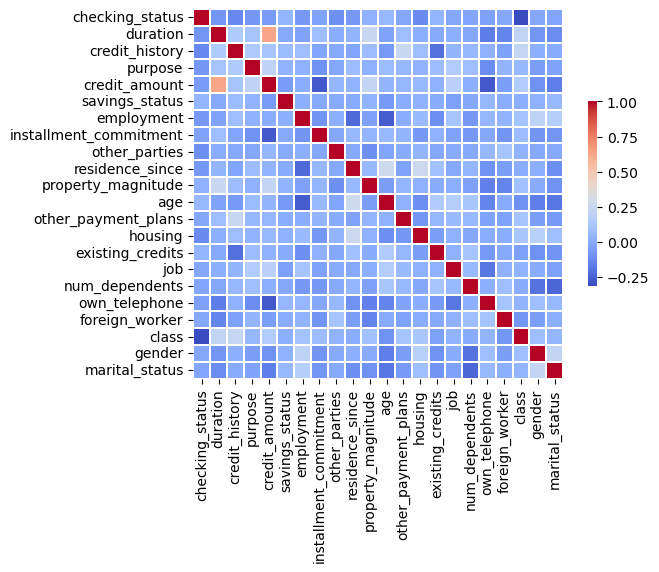

In [163]:
sns.heatmap(df_copy.corr(), fmt=".2f", cmap='coolwarm', square=True, linewidths=.1, cbar_kws={"shrink": .5})
plt.savefig('corr_heatmap.png')


## Checking status vs class
From the above correlation heatmap we can see that there's a fairly negative correlation between checking_status and class. Let's plot both the columns

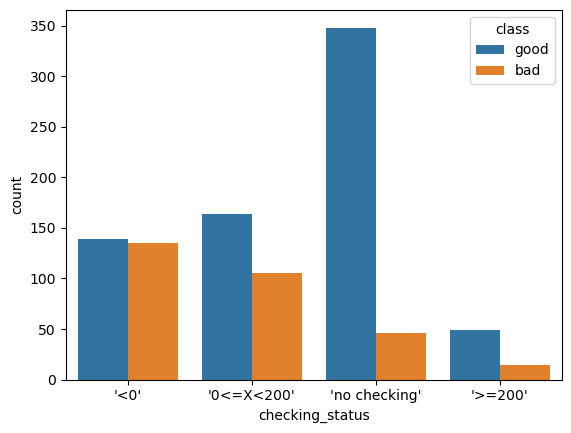

In [164]:
sns.countplot(data=df,x='checking_status',hue='class')
plt.savefig('checking_status_class.png')

**Insight**: We can see that customers who do not have any checking account have a very good credit rating. While customers having negative balance in their checking account tend of have worse credit rating

## Credit amount vs duration
We can see that there's a positive correlation between credit amount and duration from the above heatmap. Let's plot them.

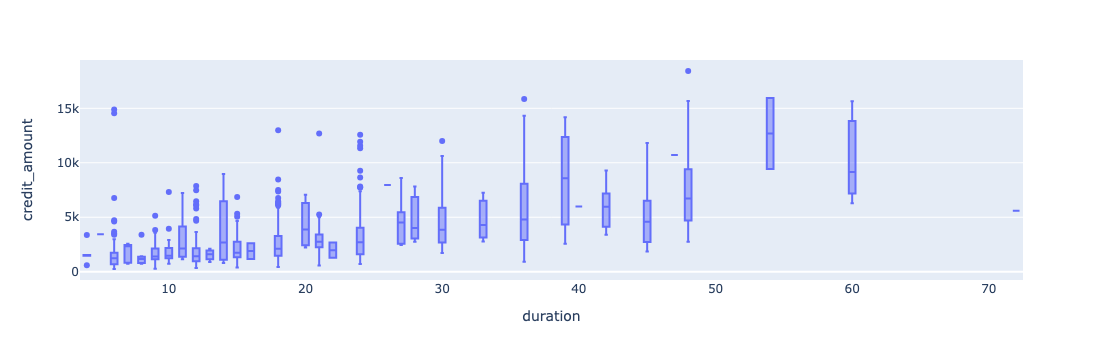

In [161]:
px.box(df, y='credit_amount', x='duration')

**Insight**: We can see the slight positive correlation - on an average, as credit amount increases, the duration increases as well.

## Credit history vs existing credits
This is a bit straightforward. Customers having only 1 existing credit with the bank have very high number of "existing paid" creidt history. While, customers having > 1 existing credits tend to have higher "critical/other existing credit" credit history

In [149]:
df['existing_credits'].unique()

array([2, 1, 3, 4])

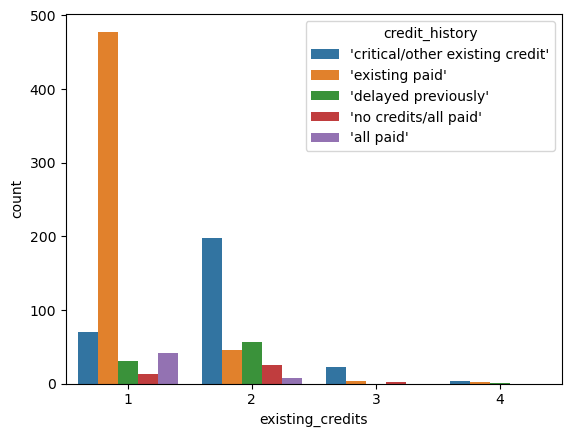

In [165]:
sns.countplot(data=df,x='existing_credits',hue='credit_history')
plt.savefig('credit_history_existing_credits.png')

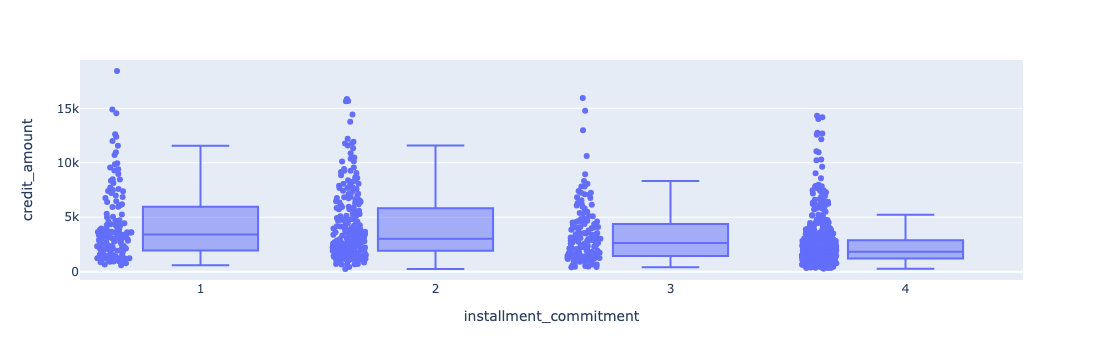

In [159]:
px.box(df, y='credit_amount', x='installment_commitment',points='all')